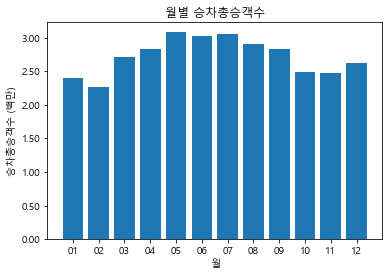

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager, rc

# 파일 경로
folder_path = r'C:\Users\User\Desktop\BigData\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# '사용년월' 컬럼에서 월 부분을 추출하여 새로운 칼럼 만들기
merged_df['Month'] = merged_df['사용년월'].astype(str).str[-2:]

# 2023년 10월, 11월, 12월의 값에 대해 2022년 10월, 11월, 12월의 값을 추가
merged_df.loc[(merged_df['사용년월'] == 202310), '승차총승객수'] += merged_df.loc[(merged_df['사용년월'] == 202210), '승차총승객수'].values[0]
merged_df.loc[(merged_df['사용년월'] == 202311), '승차총승객수'] += merged_df.loc[(merged_df['사용년월'] == 202211), '승차총승객수'].values[0]
merged_df.loc[(merged_df['사용년월'] == 202312), '승차총승객수'] += merged_df.loc[(merged_df['사용년월'] == 202212), '승차총승객수'].values[0]

# 월이 같은 데이터들을 그룹화하여 승차총승객수 합치기
monthly_passengers = merged_df.groupby('Month')['승차총승객수'].sum().reset_index()

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'Malgun Gothic' 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 결과를 시각화
plt.bar(monthly_passengers['Month'], monthly_passengers['승차총승객수'])
plt.xlabel('월')
plt.ylabel('승차총승객수 (백만)')
plt.title('월별 승차총승객수')

# y축 단위를 '백만'으로 표시하되, 소수점 둘째 자리까지 표시
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x/1e6)))

plt.show()
